In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('diabetes.csv')

df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [4]:
df[df.isna().any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


<AxesSubplot:xlabel='Outcome', ylabel='Age'>

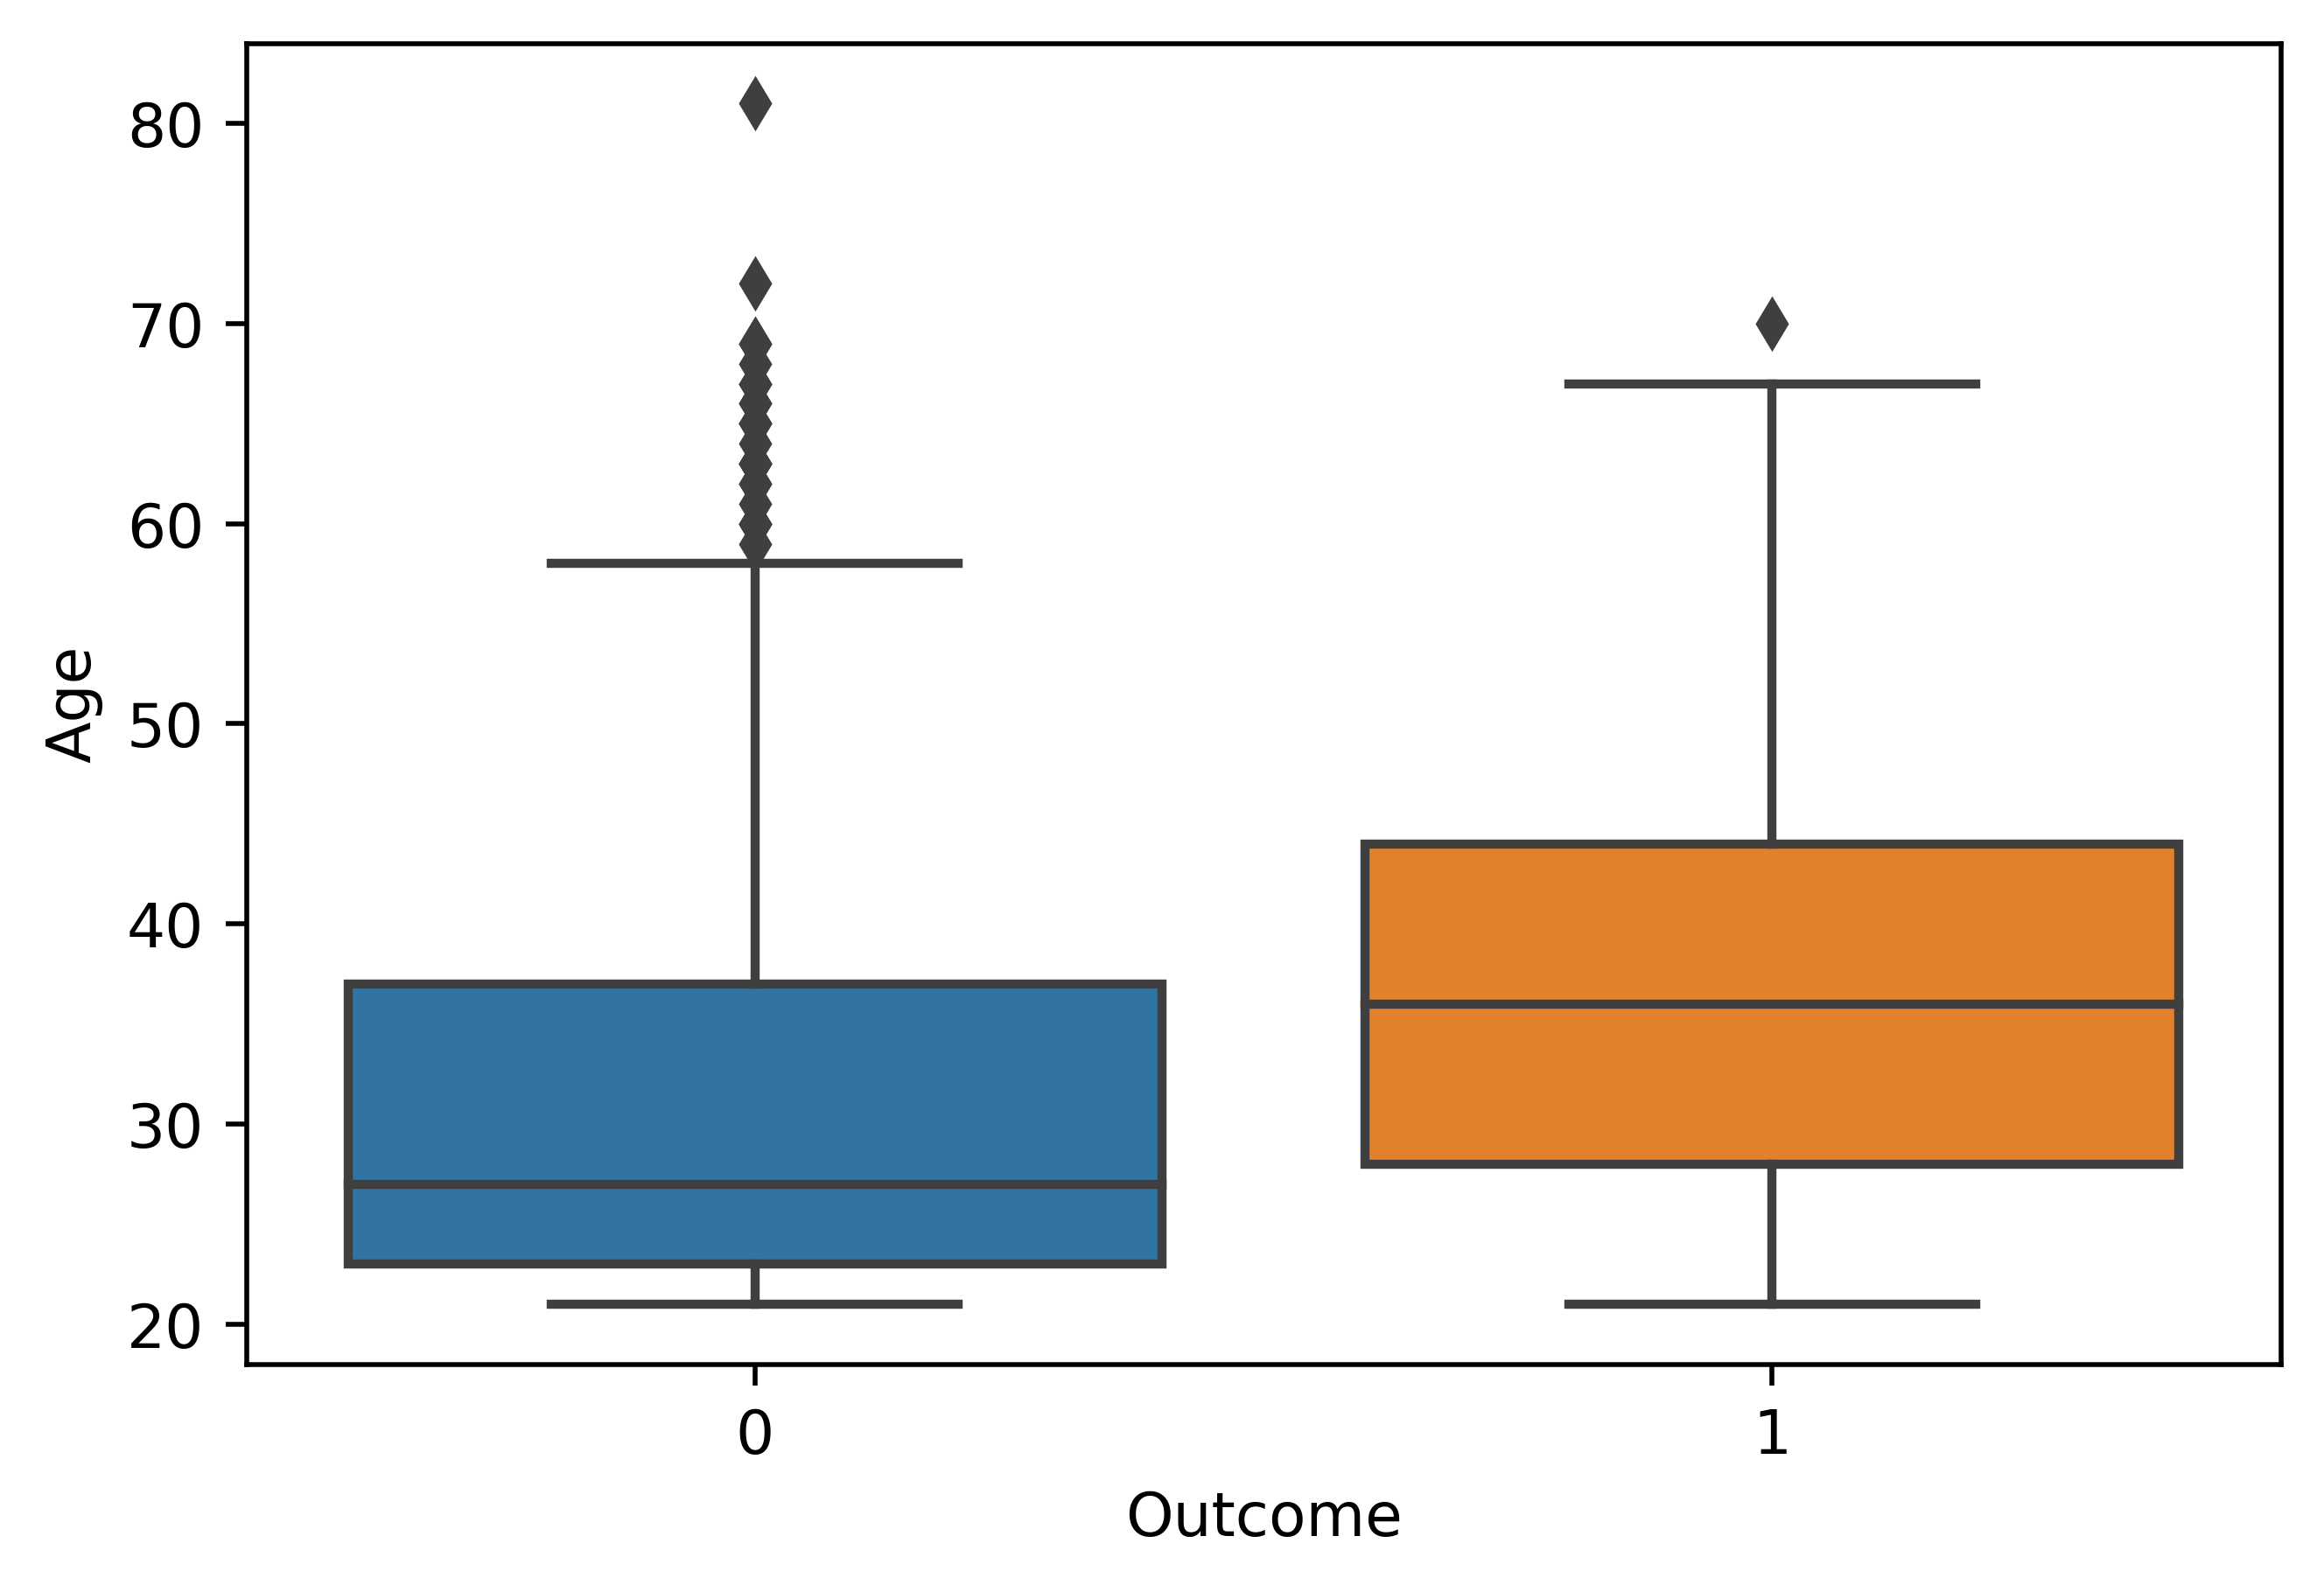

In [6]:
plt.figure(dpi=500)
sns.boxplot(data=df,x='Outcome',y='Age')

<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

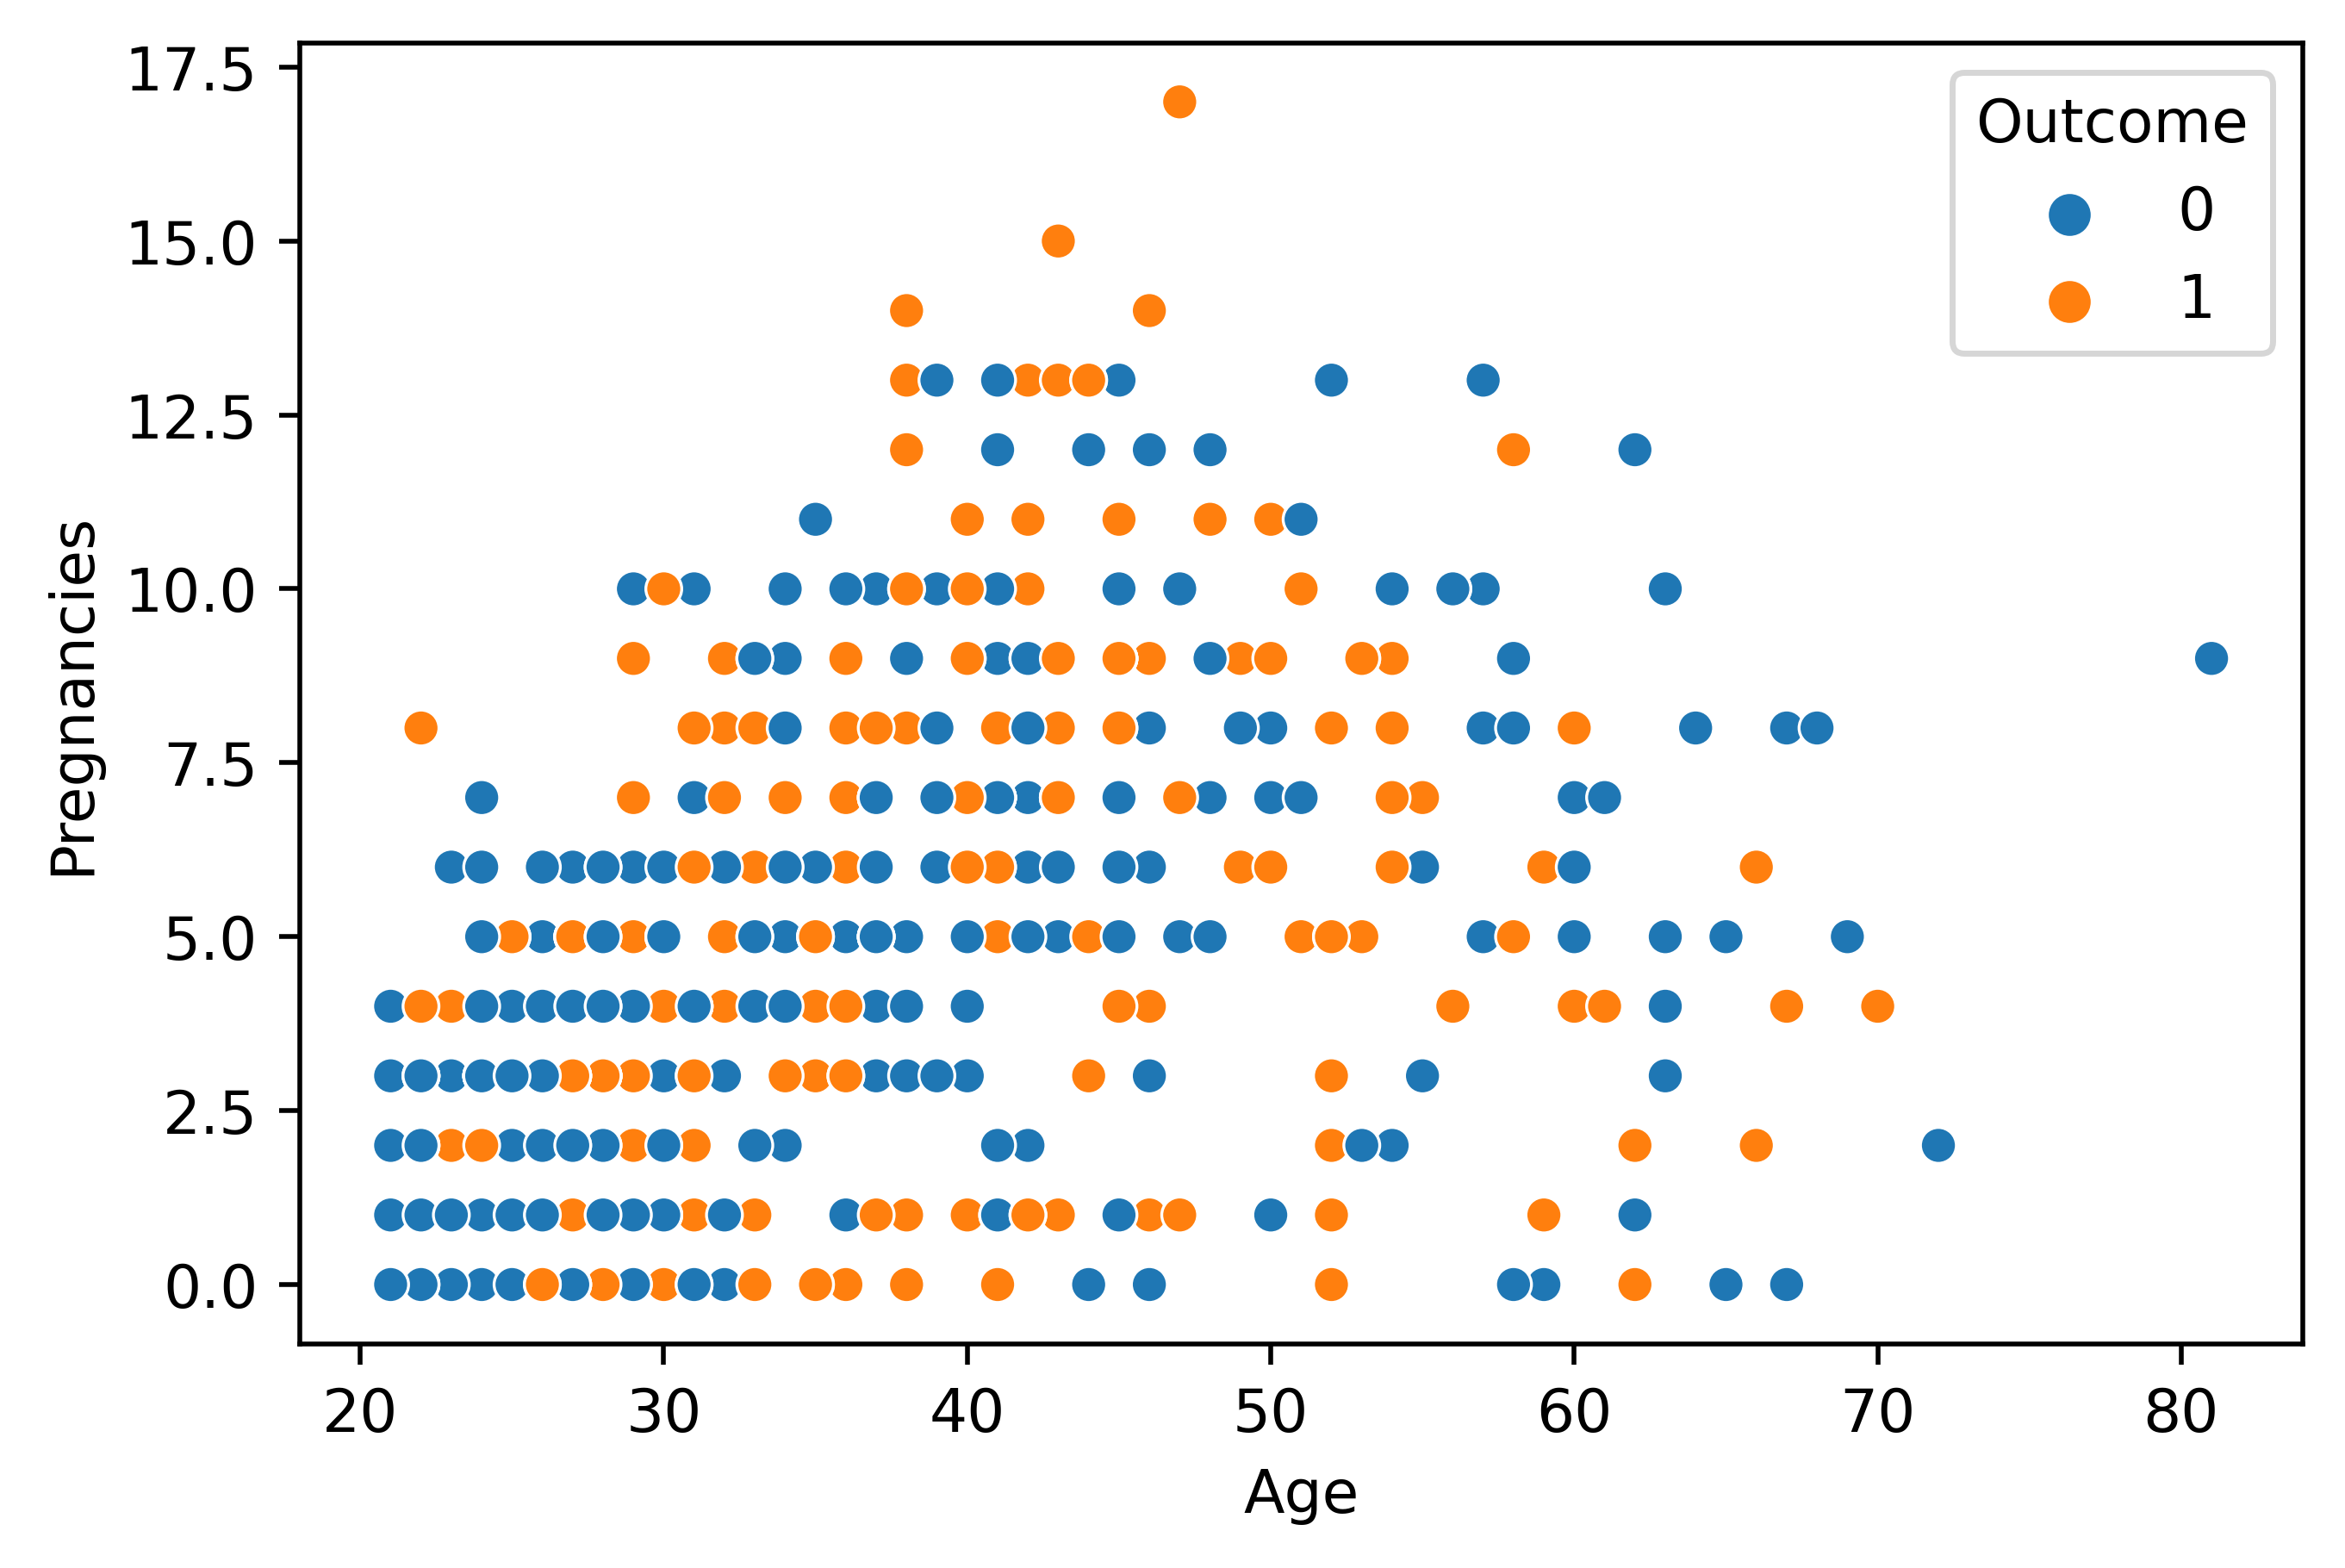

In [11]:
plt.figure(dpi=500)
sns.scatterplot(data=df,x='Age',y='Pregnancies',hue='Outcome')

<AxesSubplot:xlabel='Age', ylabel='DiabetesPedigreeFunction'>

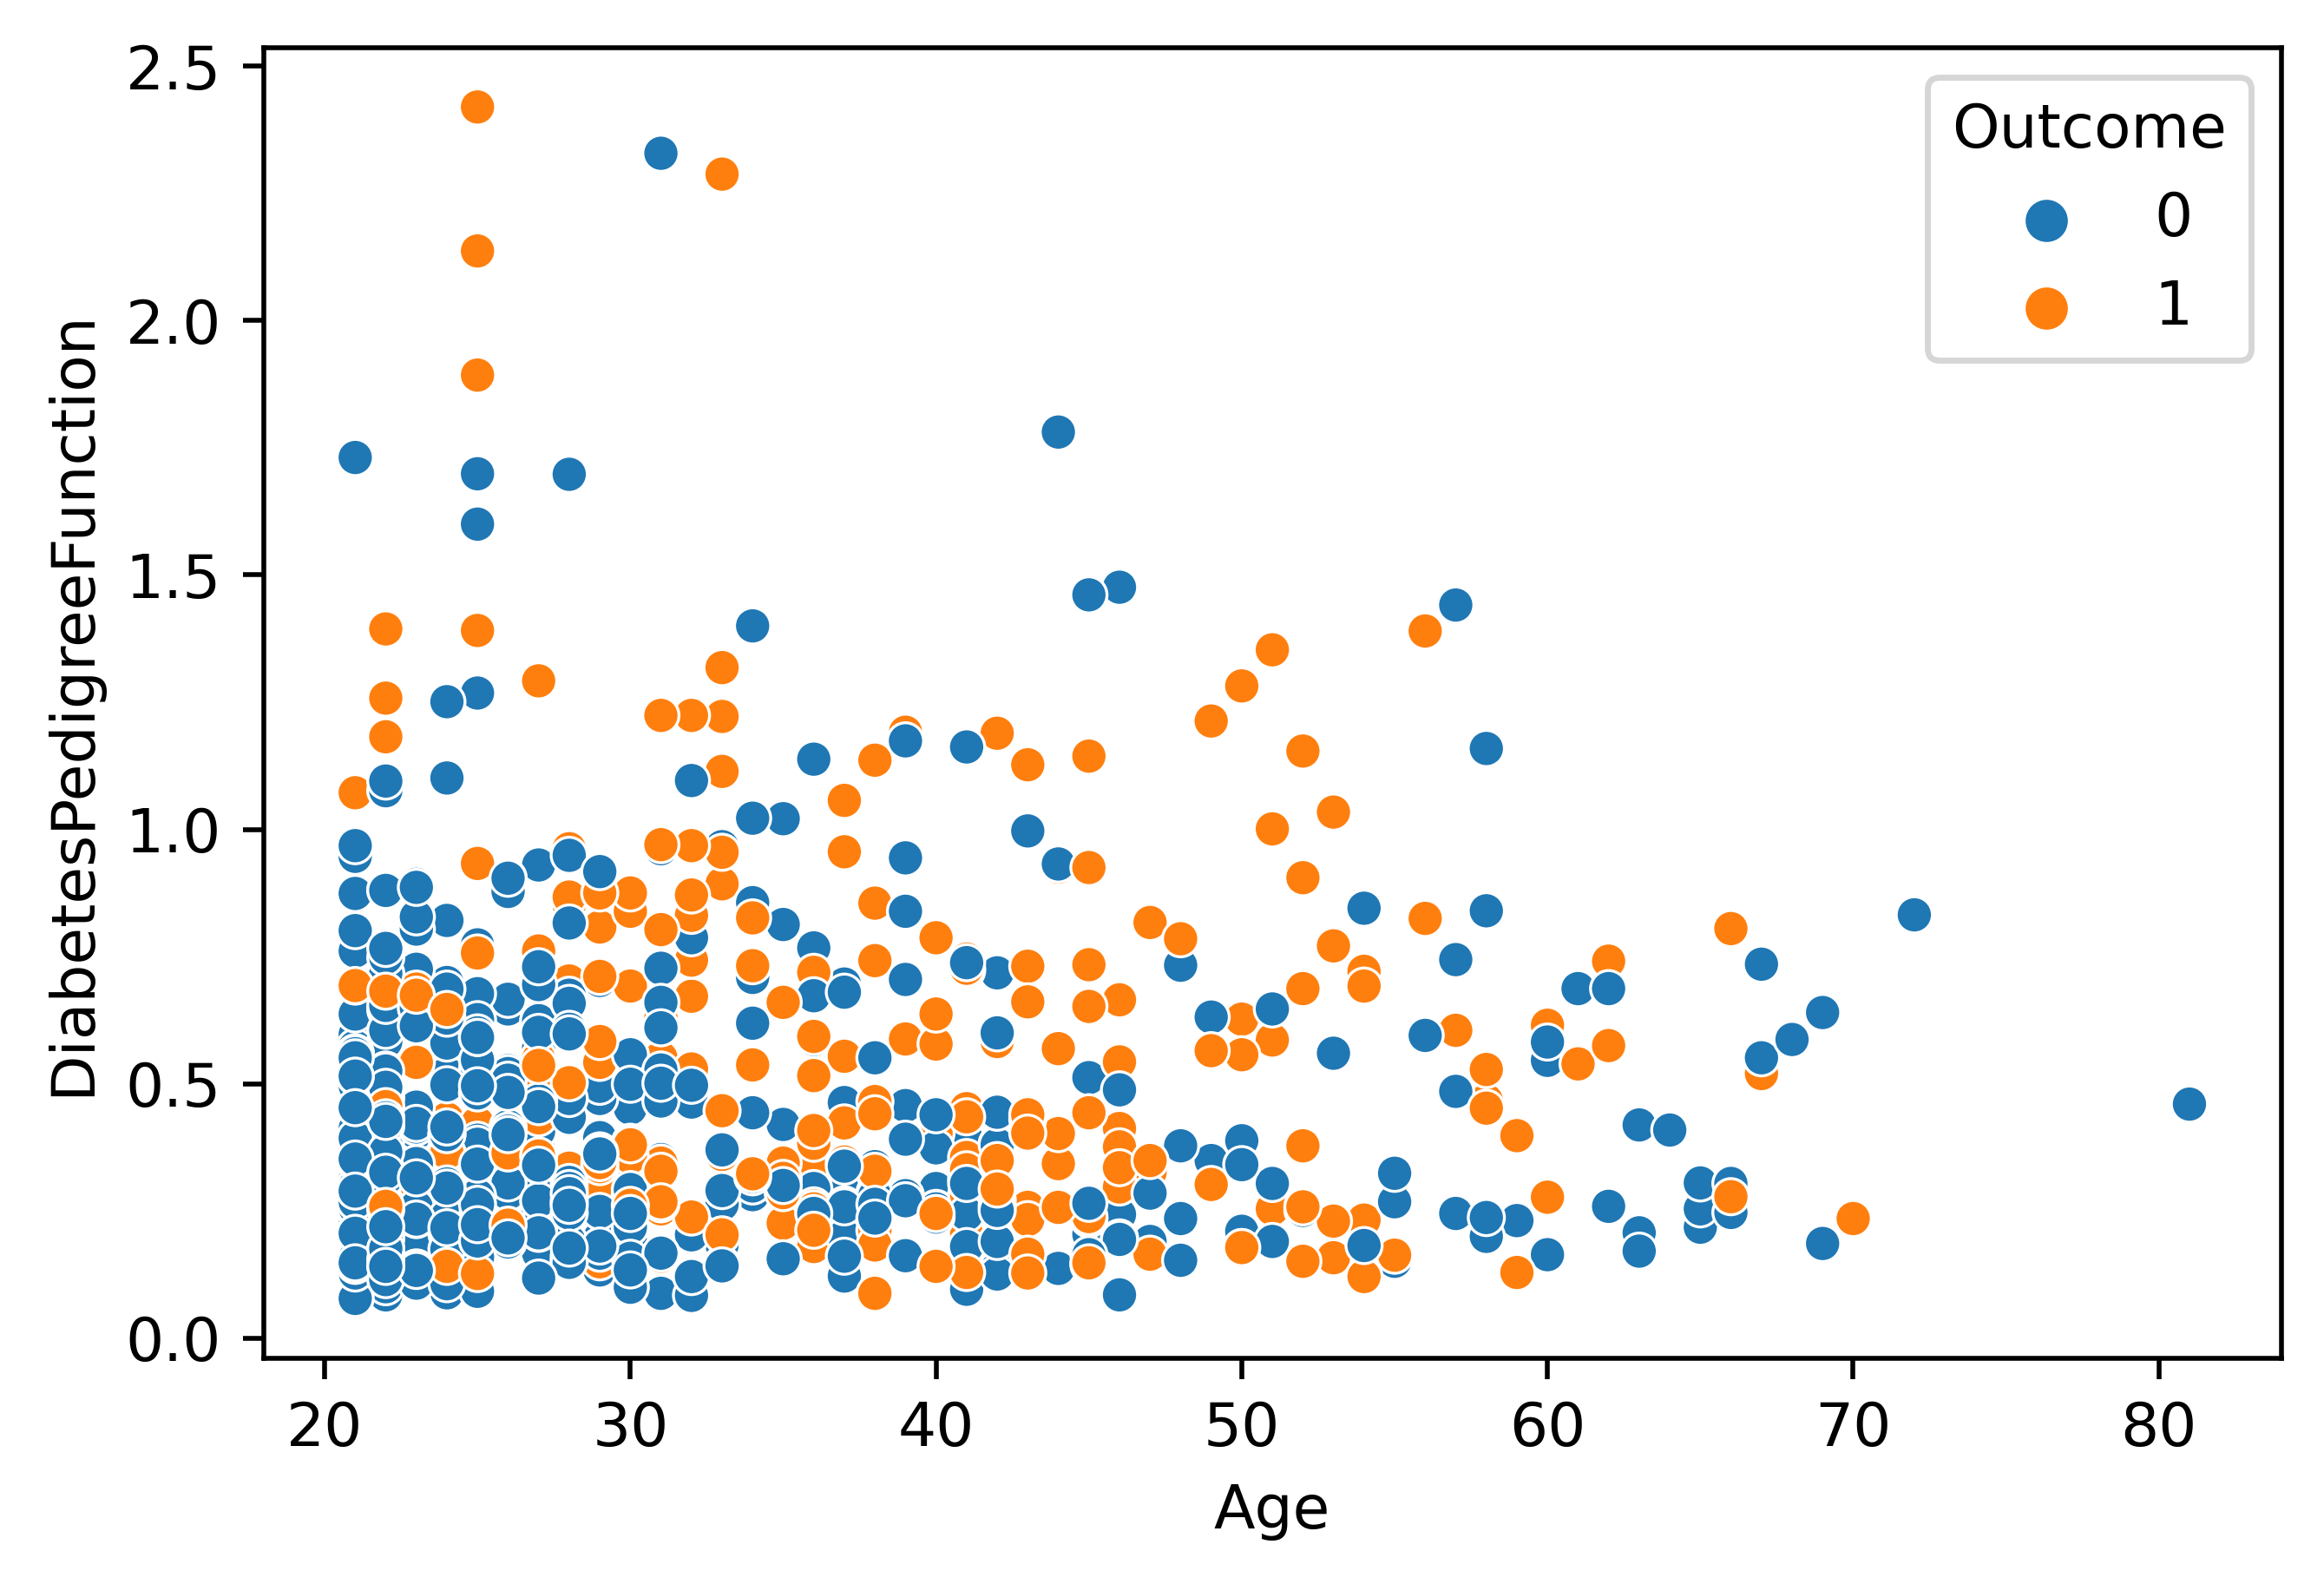

In [12]:
plt.figure(dpi=500)
sns.scatterplot(data=df,x='Age',y='DiabetesPedigreeFunction',hue='Outcome')

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

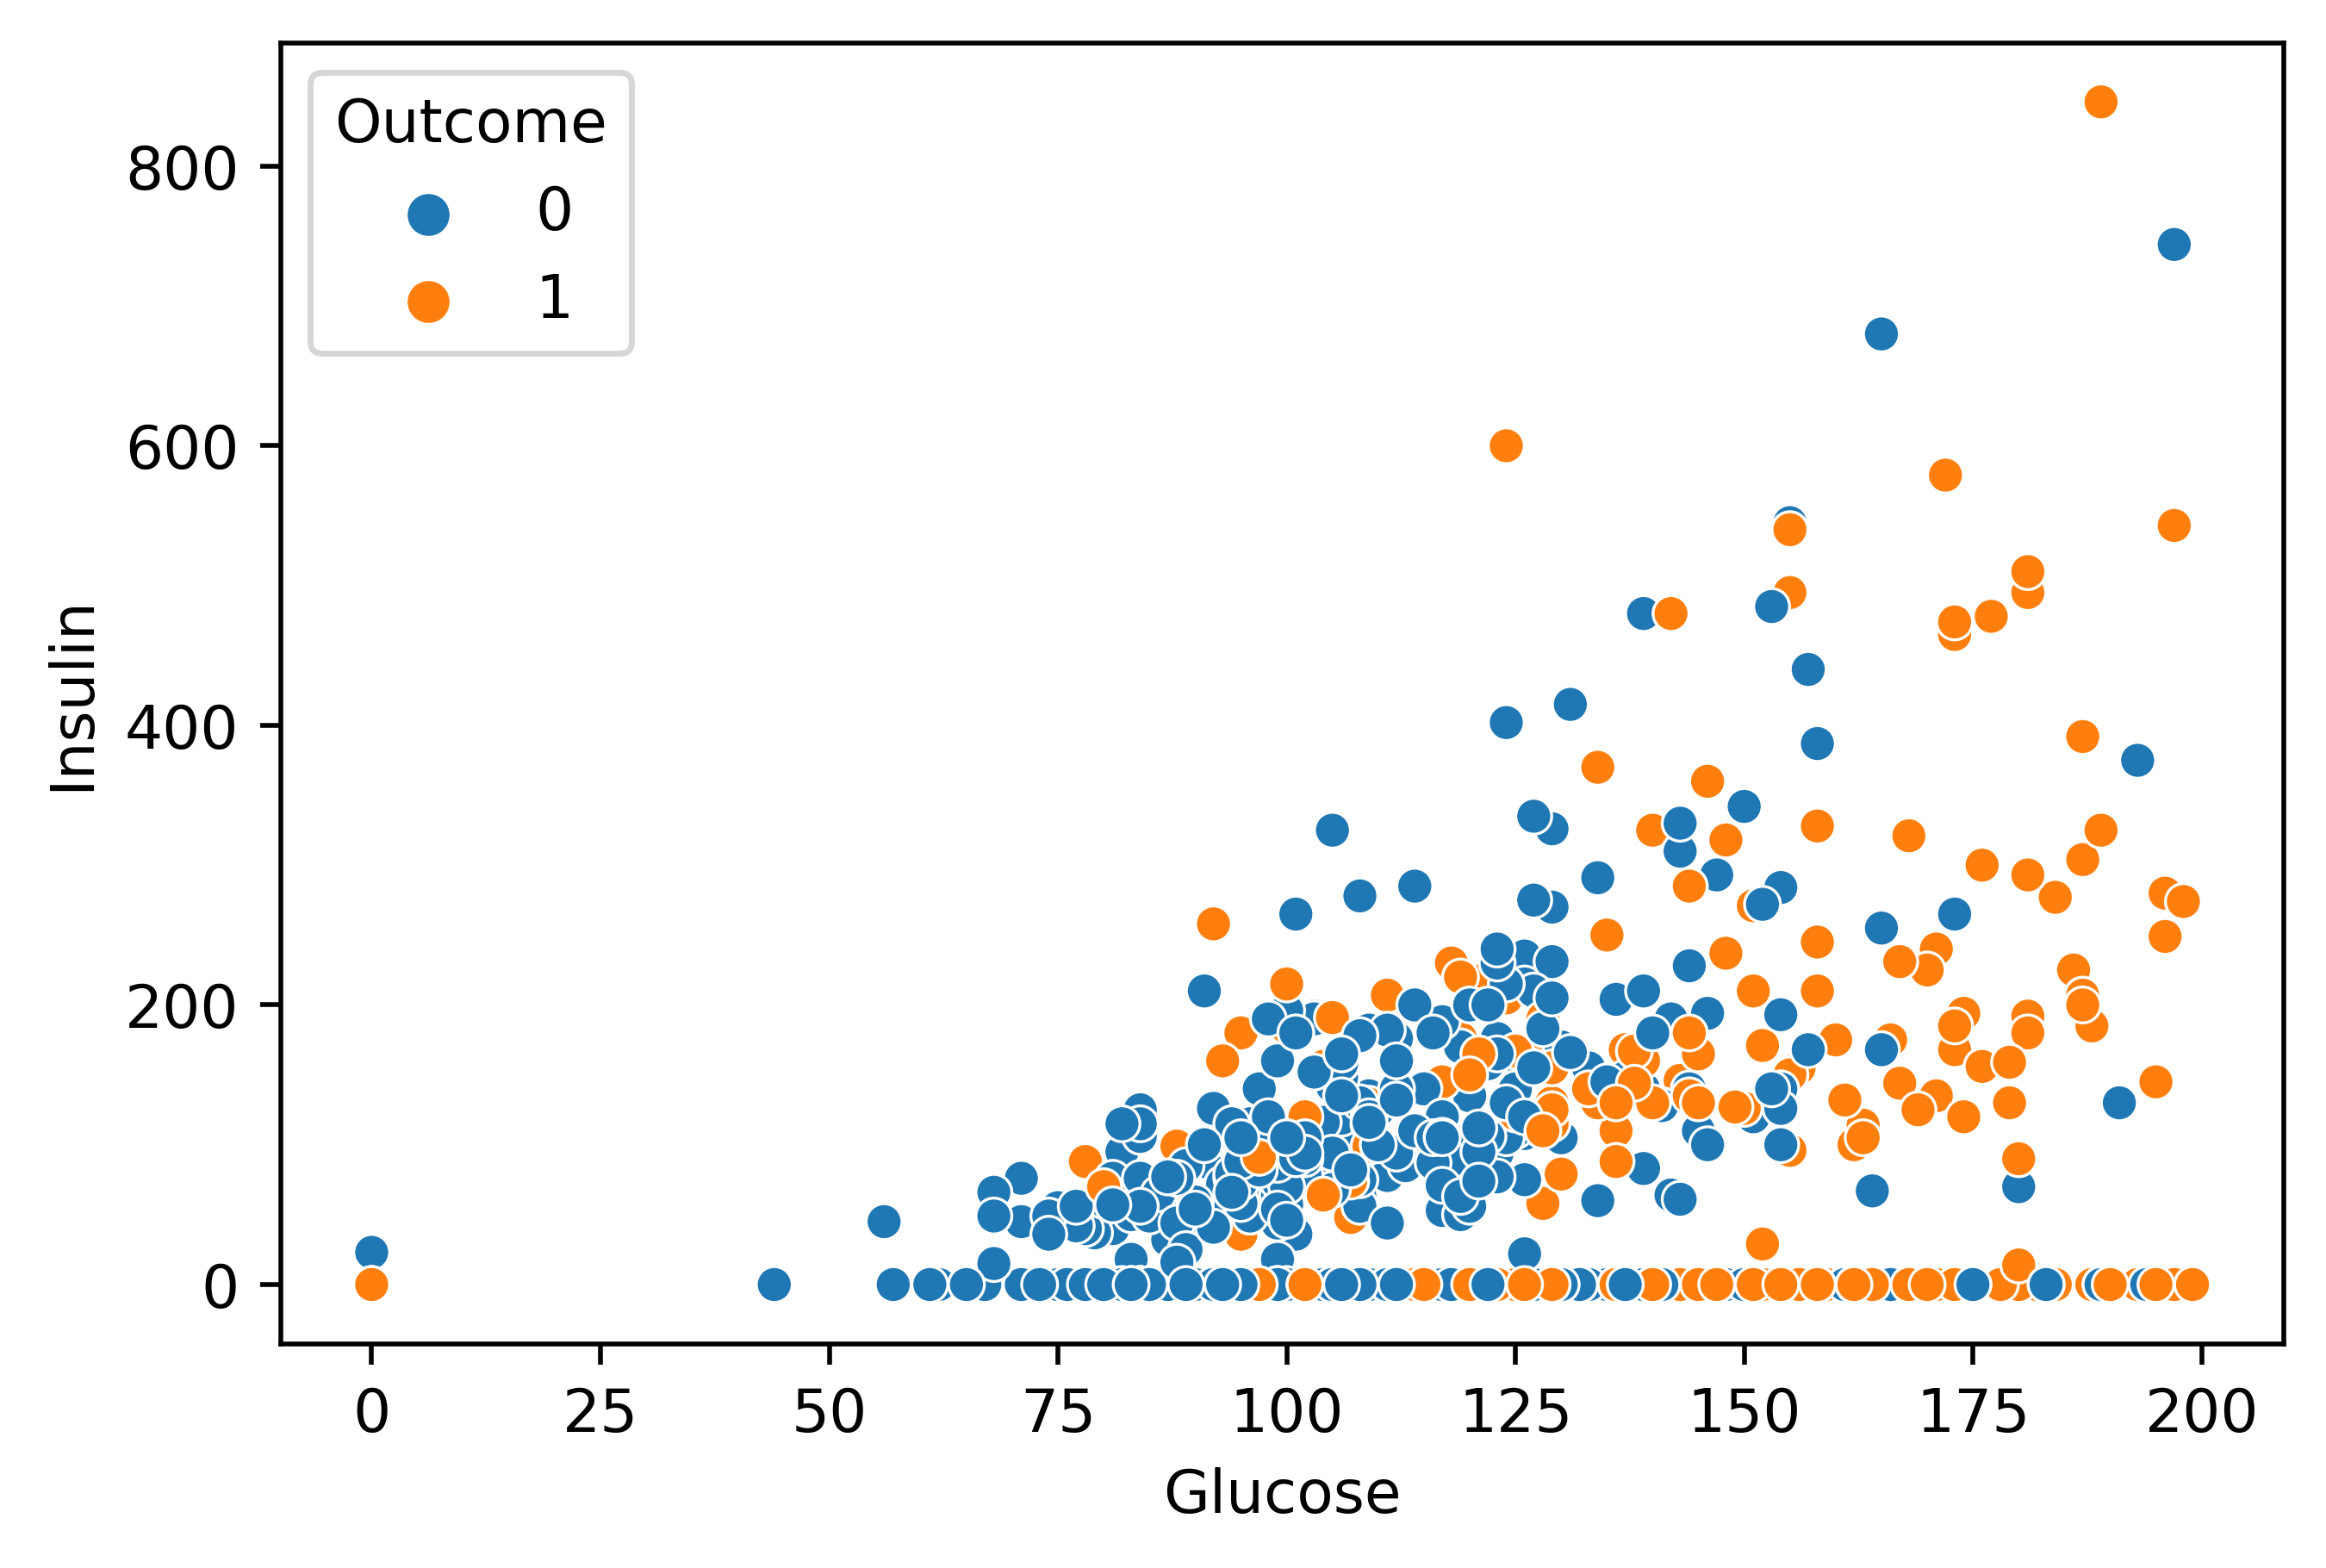

In [14]:
plt.figure(dpi=500)
sns.scatterplot(data=df,x='Glucose',y='Insulin',hue='Outcome')

<Figure size 3000x2000 with 0 Axes>

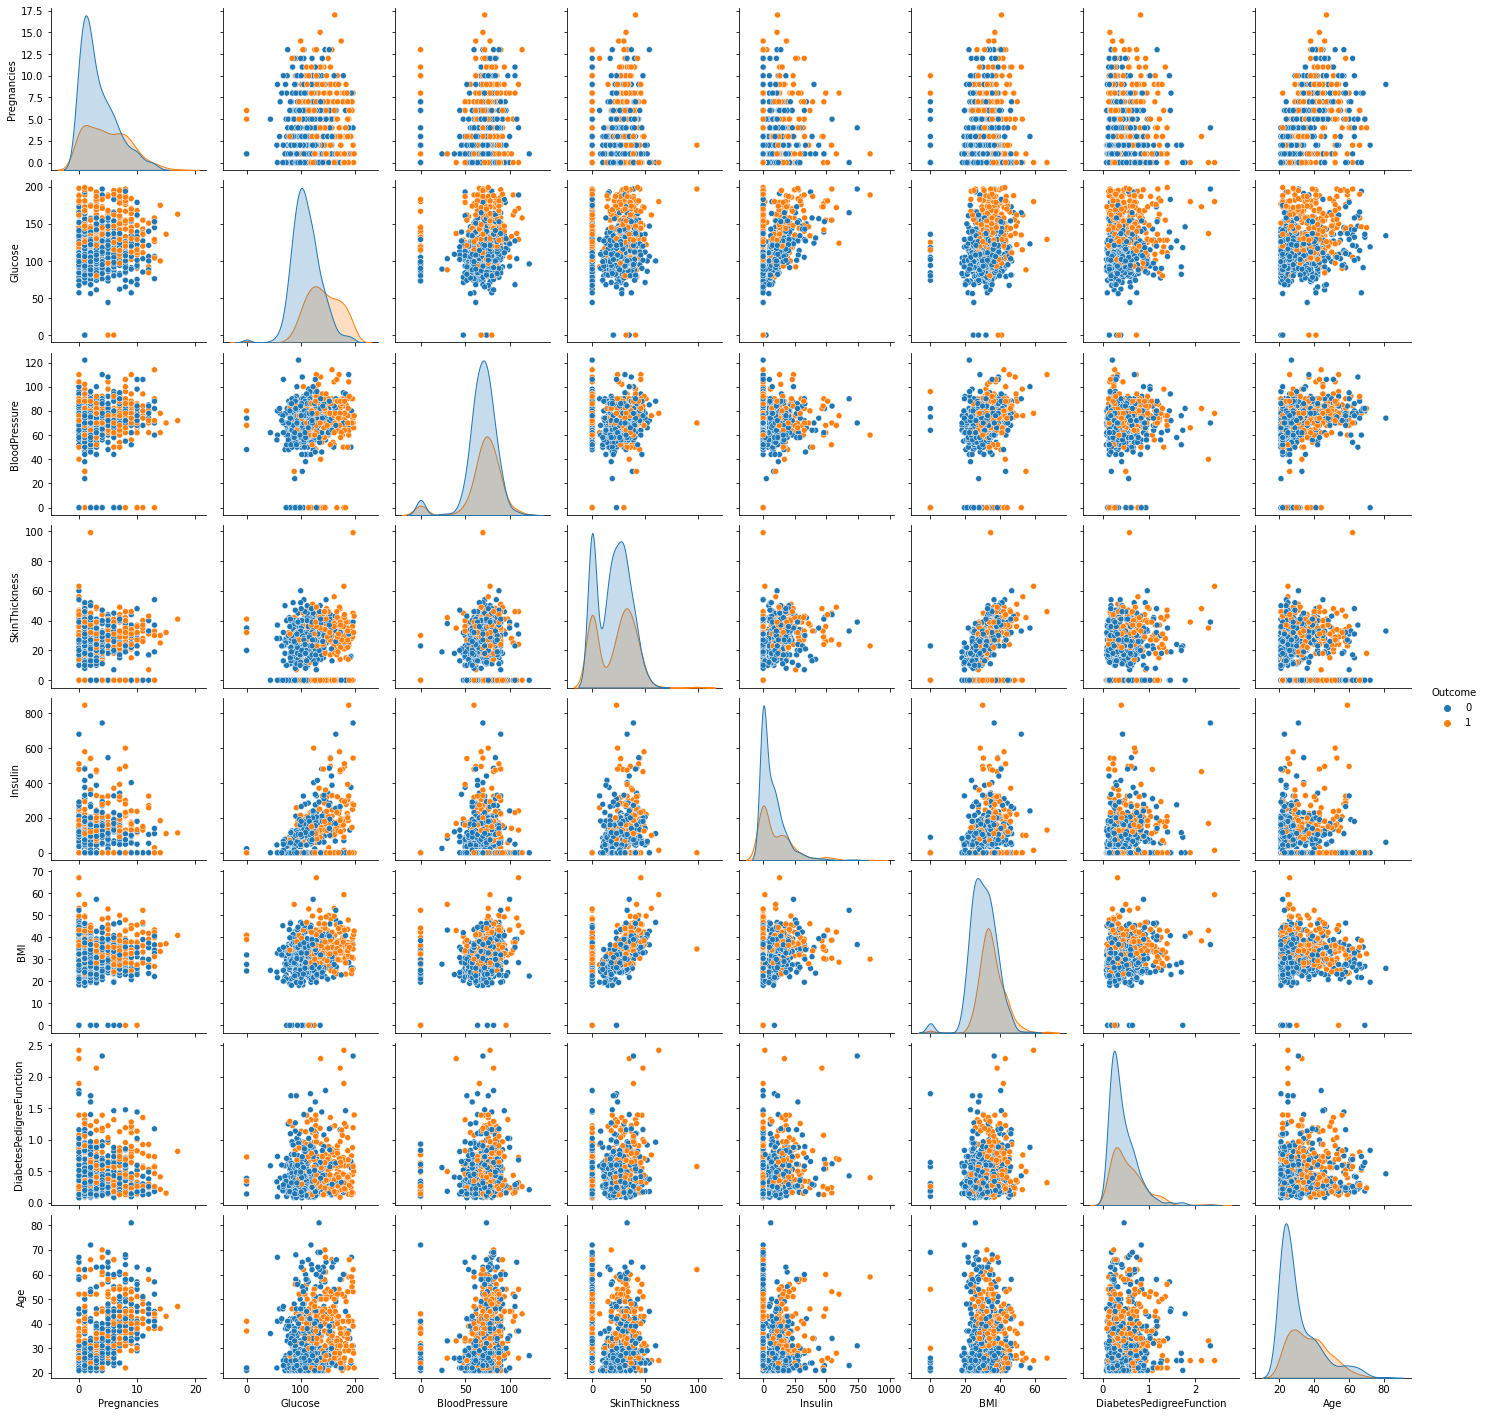

In [15]:
plt.figure(dpi=500)
sns.pairplot(df,hue='Outcome')

Text(0.5, 1.0, 'Count Of OutCome')

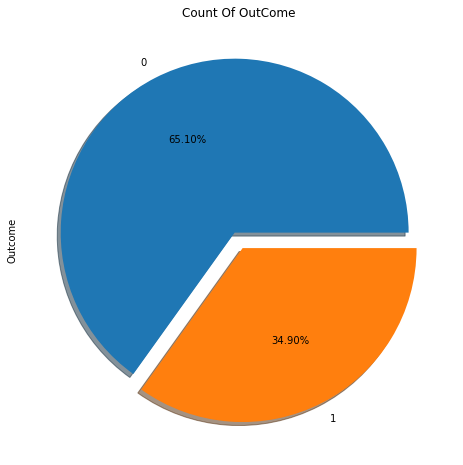

In [17]:
df['Outcome'].value_counts().plot.pie(figsize=(19,8),autopct='%1.2f%%',shadow=True,explode=[0.05,0.05]).set_title('Count Of OutCome')

In [18]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [19]:
X=df.drop('Outcome',axis=1)

y=df['Outcome']

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [24]:
scaler=StandardScaler()

In [25]:
scalerXtrain=scaler.fit_transform(X_train)

In [26]:
scalerXtest=scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model=LogisticRegression()

In [29]:
model.fit(scalerXtrain,y_train)

LogisticRegression()

In [30]:
test_predict=model.predict(scalerXtest)

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report,roc_curve

In [32]:
accuracy_score(y_test,test_predict)

0.7878787878787878

In [33]:
confusion_matrix(y_test,test_predict)

array([[133,  17],
       [ 32,  49]], dtype=int64)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


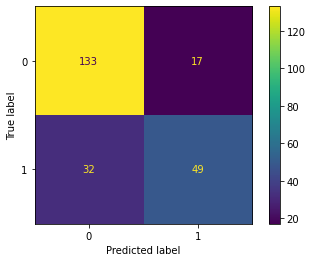

In [35]:
plot_confusion_matrix(model,scalerXtest,y_test)

In [36]:
1-accuracy_score(y_test,test_predict)

0.21212121212121215

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn= KNeighborsClassifier(n_neighbors=5)

# checking for test error:

In [43]:
test_erroe_rate = []

for i in range(1,30):
    knn_model= KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(scalerXtrain,y_train)
    
    test_prediction=knn_model.predict(scalerXtest)
    
    test_error=1-accuracy_score(y_test,test_prediction)
    
    test_erroe_rate.append(test_error)

In [44]:
test_erroe_rate

[0.29004329004329,
 0.303030303030303,
 0.23376623376623373,
 0.2683982683982684,
 0.23809523809523814,
 0.24675324675324672,
 0.24675324675324672,
 0.23809523809523814,
 0.23809523809523814,
 0.22510822510822515,
 0.23376623376623373,
 0.23376623376623373,
 0.2597402597402597,
 0.23376623376623373,
 0.24242424242424243,
 0.2554112554112554,
 0.25108225108225113,
 0.25108225108225113,
 0.23376623376623373,
 0.25108225108225113,
 0.2597402597402597,
 0.2727272727272727,
 0.25108225108225113,
 0.24242424242424243,
 0.24242424242424243,
 0.23376623376623373,
 0.22943722943722944,
 0.23809523809523814,
 0.22943722943722944]

Text(0, 0.5, 'Error Rate')

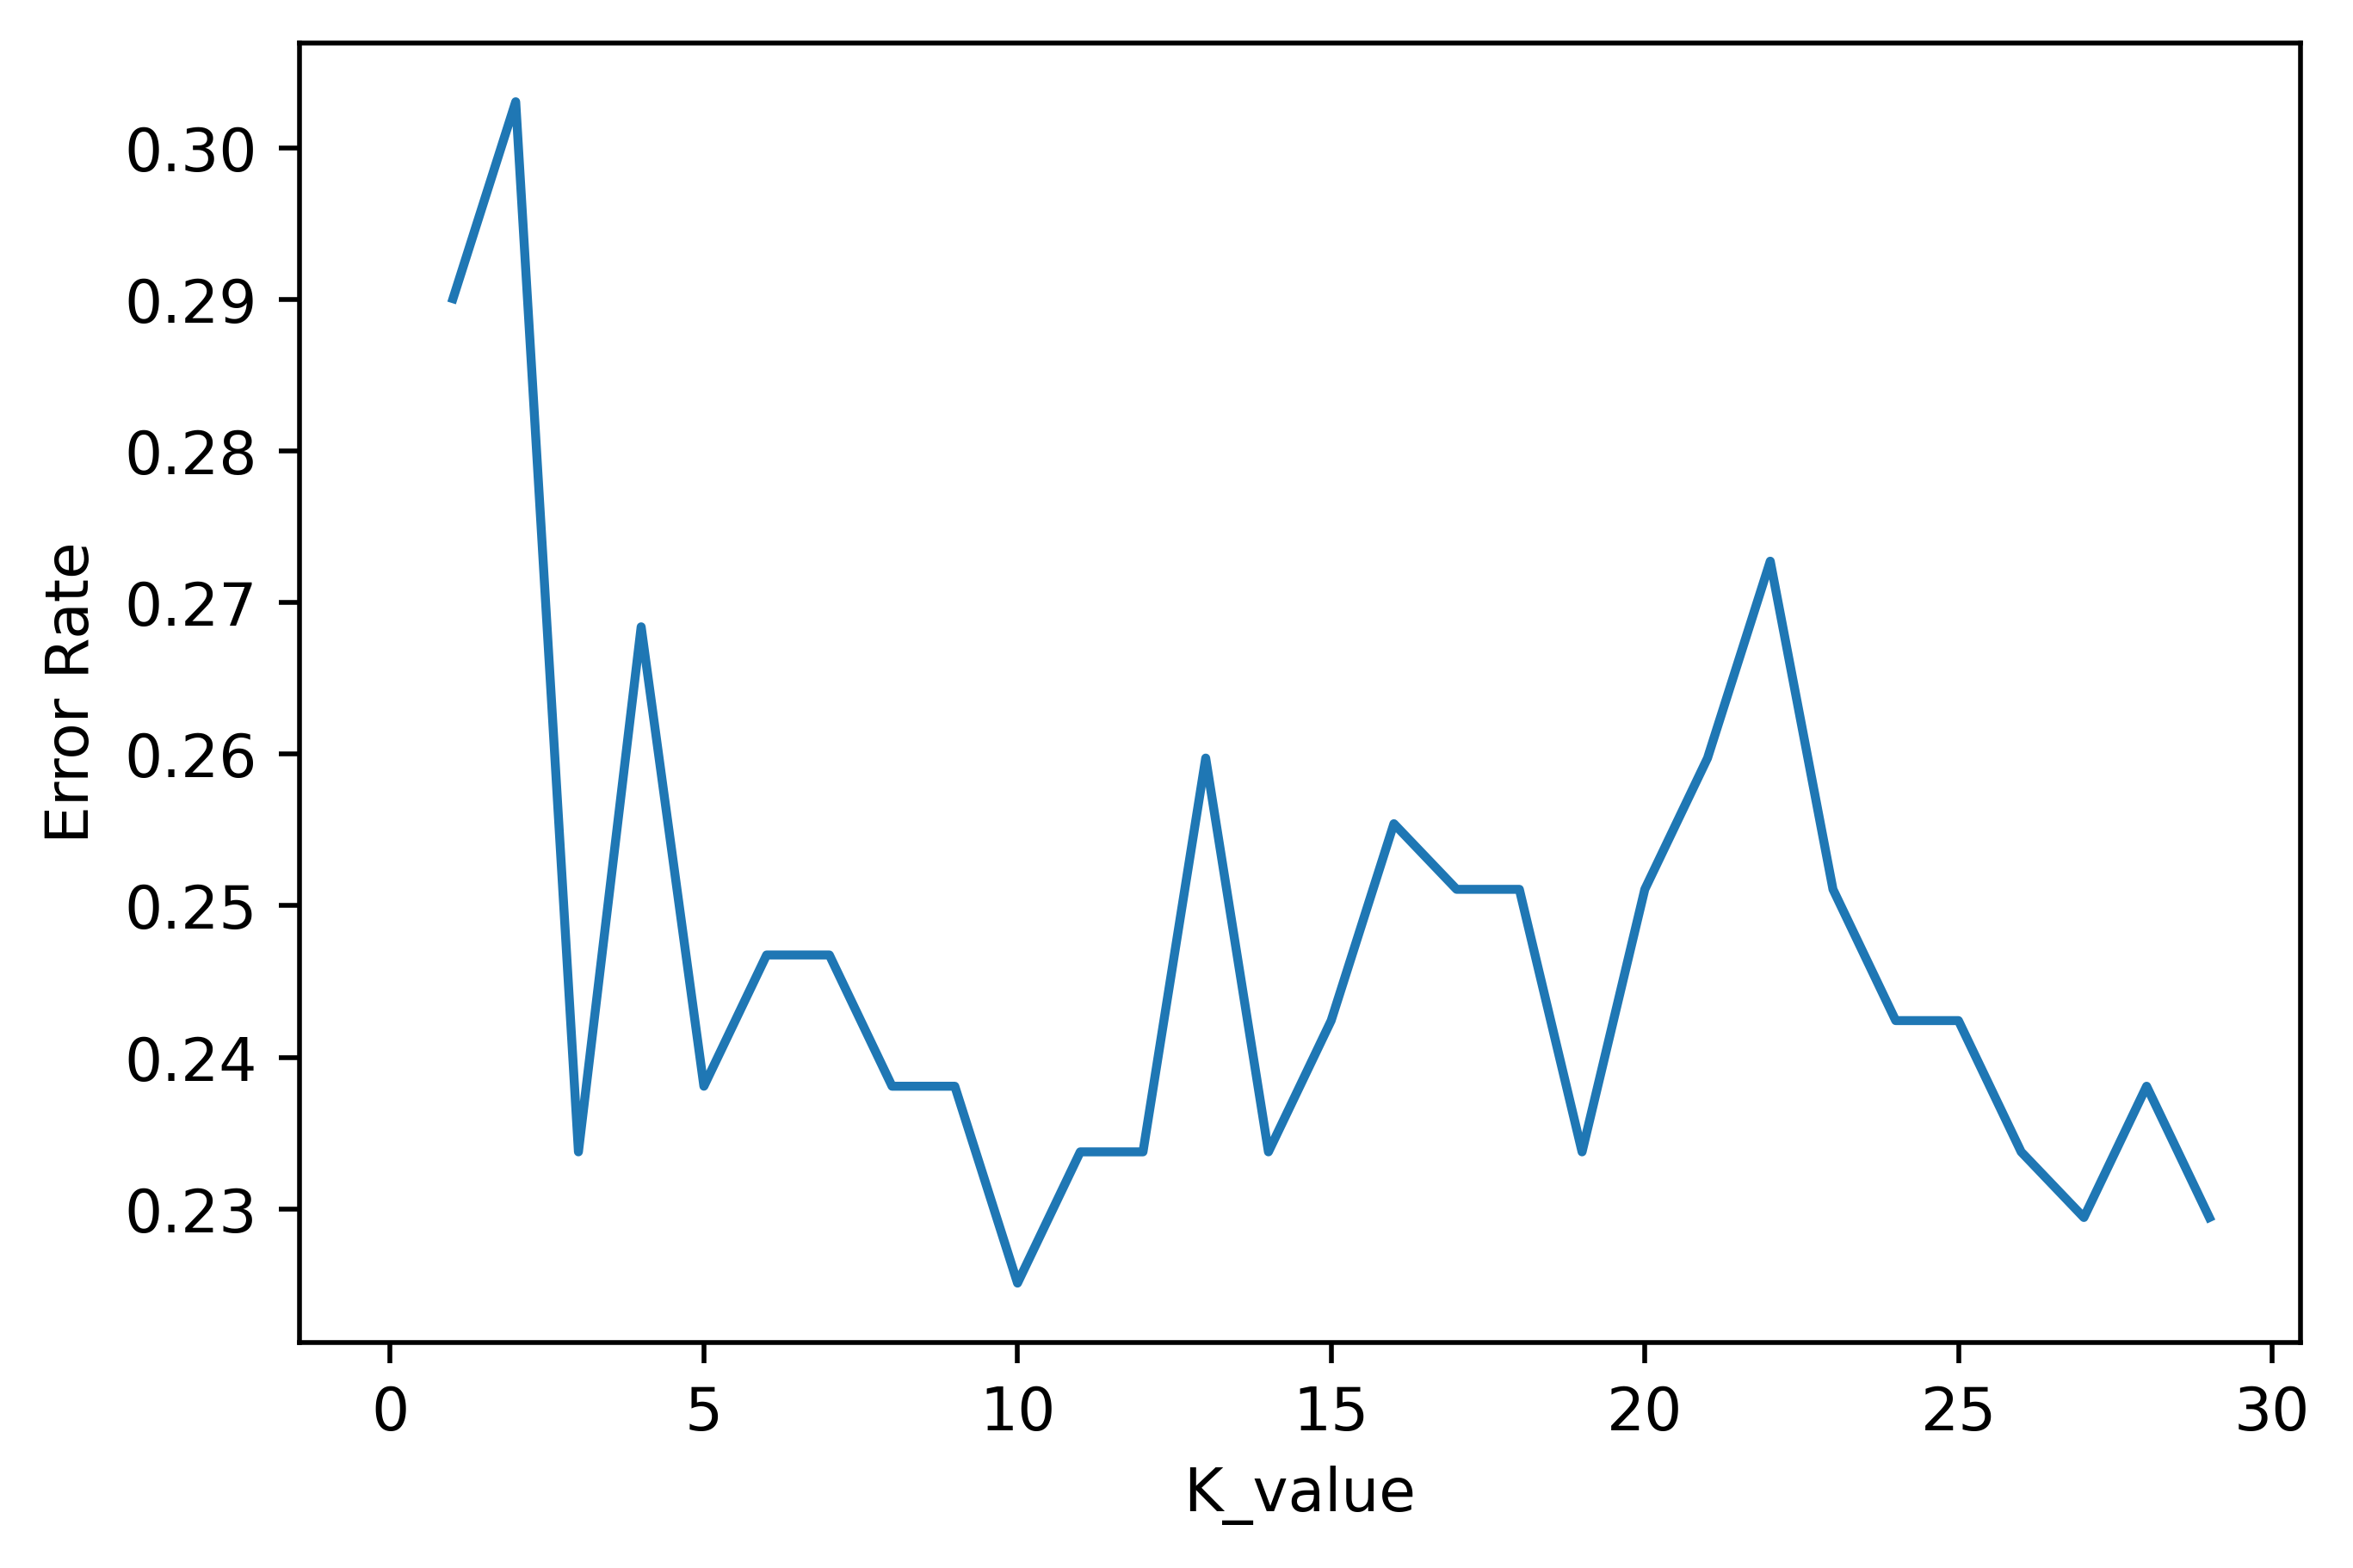

In [50]:
plt.figure(dpi=500)
plt.plot(range(1,30),test_erroe_rate,test_error);
plt.xlabel('K_value')
plt.ylabel('Error Rate')

# Creating a Pipeline

In [51]:
scalers=StandardScaler()
knn=KNeighborsClassifier()


In [53]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [56]:
Opertaions=[('scalers',scalers),('knn',knn)]

In [57]:
from sklearn.pipeline import Pipeline

In [58]:
pip=Pipeline(Opertaions)

In [59]:
from sklearn.model_selection import GridSearchCV

In [76]:
k_values=list(range(1,10))

In [77]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [74]:
classifier=GridSearchCV(pip,param_grid,cv=5,scoring='accuracy')

In [79]:
dframe=df.copy()

In [82]:
dframe.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [83]:
X=dframe.drop('Outcome',axis=1)

y=dframe['Outcome']

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
scarlet=StandardScaler()

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [88]:
xtrain=scarlet.fit_transform(X_train)

In [89]:
xtest=scarlet.transform(X_test)

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
kkn=KNeighborsClassifier( n_neighbors=5,p=2,metric='minkowski')

In [92]:
knntrain=knn.fit(X_train,y_train)

In [93]:
knntest_pred=knn.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix

In [95]:
accuracy_score(y_test,knntest_pred)

0.7007874015748031

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


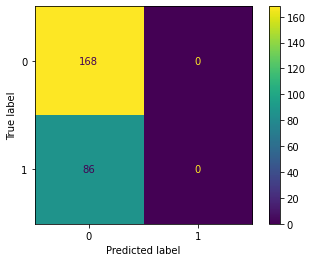

In [102]:
plot_confusion_matrix(knn,xtest,knntest_pred)

In [104]:
confusion_matrix(y_test,knntest_pred)

array([[130,  38],
       [ 38,  48]], dtype=int64)

In [105]:
1-accuracy_score(y_test,knntest_pred)

0.2992125984251969

In [106]:
error_rate=[]

for k in range(1,30):
    knn=KNeighborsClassifier( n_neighbors=k)
    knn.fit(X_train,y_train)
    
    y_pred=knn.predict(X_test)
    
    checkin=1-accuracy_score(y_test,y_pred)
    
    error_rate.append(checkin)
    
    

In [107]:
error_rate

[0.3031496062992126,
 0.2755905511811023,
 0.32677165354330706,
 0.2716535433070866,
 0.2992125984251969,
 0.28740157480314965,
 0.31496062992125984,
 0.28740157480314965,
 0.2834645669291339,
 0.28740157480314965,
 0.2755905511811023,
 0.25984251968503935,
 0.27952755905511806,
 0.2834645669291339,
 0.2755905511811023,
 0.2834645669291339,
 0.28740157480314965,
 0.2834645669291339,
 0.2992125984251969,
 0.2755905511811023,
 0.28740157480314965,
 0.2755905511811023,
 0.28740157480314965,
 0.2716535433070866,
 0.27952755905511806,
 0.2716535433070866,
 0.2716535433070866,
 0.2716535433070866,
 0.2755905511811023]

Text(0.5, 0, 'Values')

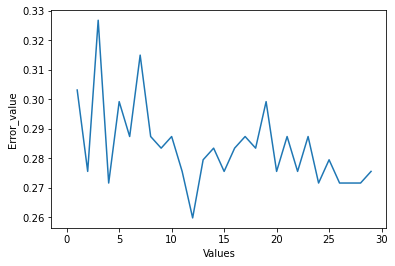

In [109]:
plt.plot(range(1,30),error_rate,checkin)
plt.ylabel('Error_value')
plt.xlabel('Values')